In [16]:
# %pip install dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
# %pip install langchain-huggingface

In [7]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint

In [8]:
llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    task="text-generation",
    max_new_tokens=512,
    temperature=0.7
)

In [10]:
model=ChatHuggingFace(llm=llm)

In [11]:
model.invoke("Hello, how are you?")

AIMessage(content=" I'm just a computer program, so I don't have feelings or the ability to be in a particular state. I'm here to help answer any questions you might have to the best of my ability. Is there something specific you'd like to ask about?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 11, 'total_tokens': 67}, 'model_name': 'mistralai/Mistral-7B-Instruct-v0.2', 'system_fingerprint': '', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b7742-7263-7a11-98ab-fcd1f189164c-0', usage_metadata={'input_tokens': 11, 'output_tokens': 56, 'total_tokens': 67})

In [12]:
class BASE_STATE(TypedDict):
    question: str
    answer: str

In [13]:
def llm_qa(state: BASE_STATE) -> BASE_STATE:
    #extract the question from the state
    question = state['question']
    #generate the answer using the LLM
    prompt = f"Answer the following question {question}"
    answer=model.invoke(prompt)
    #update the state with the answer
    state['answer'] = answer
    return state


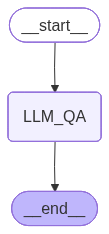

In [18]:
# Create the state graph
graph=StateGraph(BASE_STATE)

#Make a NOde
graph.add_node("LLM_QA",llm_qa)

#Add Egdes
graph.add_edge(START,"LLM_QA")
graph.add_edge("LLM_QA",END)
# Run the graph

graph.compile()